<a href="https://colab.research.google.com/github/nachovalla1997/Tarea1_MachineLearning/blob/main/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1


La tarea siguiente implica el uso de un dataset real para el cual van a tener que entrenar un Árbol de decisión para detectar cancer de mama a partir de distintas mediciones. 

La descripción del dataset la pueden encontrar aquí: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

In [233]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz 

# Agregar librerias que entiendan necesarias para el trabajo

In [234]:
# Descargo dataset
! wget -O breast_cancer.csv https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data


--2021-09-29 05:32:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [application/x-httpd-php]
Saving to: ‘breast_cancer.csv’

breast_cancer.csv   100%[===================>]  19.42K  --.-KB/s    in 0.03s   

2021-09-29 05:32:01 (704 KB/s) - ‘breast_cancer.csv’ saved [19889/19889]



In [235]:
# Guardo dataset en un dataframes de pandas
column_names = ["Id", "clump_thicknes", "cell_size", "cell_shape", "adhesion", "epithelial_cell_size", "nuclei", "chromatin", "nucleoli", "mitoses", "target"]
df = pd.read_csv("breast_cancer.csv", header = None, names = column_names)

In [236]:
df.head(5)

# Nota: Tomar las variables como numéricas (no categóricas)

,Id,clump_thicknes,cell_size,cell_shape,adhesion,epithelial_cell_size,nuclei,chromatin,nucleoli,mitoses,target
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [237]:
# Dejamos como índice la columna ID
df.set_index("Id", inplace = True)

In [238]:
df

,clump_thicknes,cell_size,cell_shape,adhesion,epithelial_cell_size,nuclei,chromatin,nucleoli,mitoses,target
Id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4


In [239]:
df["nuclei"].replace('?', np.nan, inplace = True)

In [240]:
# En el dataset las clases son 2 y 4 que representan Benigno y Maligno, vamos a reemplazarlas por 0 y 1 por simplicidad.
df["target"].replace(2, 0, inplace = True)
df["target"].replace(4, 1, inplace = True)

# 2 era cancer benigno (ahora es 0)
# 4 era cancer maligno (ahora es 1)

In [241]:
df.head(100)


,clump_thicknes,cell_size,cell_shape,adhesion,epithelial_cell_size,nuclei,chromatin,nucleoli,mitoses,target
Id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,0
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0
1016277,6,8,8,1,3,4,3,7,1,0
1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1164066,1,1,1,1,2,1,3,1,1,0
1165297,2,1,1,2,2,1,1,1,1,0
1165790,5,1,1,1,2,1,3,1,1,0


In [242]:
# Ya con esto separamos variables predictoras por un lado, y target por el otro

x = df.drop(columns = "target")
y = df["target"]

##Ejercicios


**A - Análisis Exploratorio**

Realice un análisis exploratorio de los datos para contestar mínimamente lo siguiente:

1.   ¿Cuantos registros tiene el dataset? 
2.   ¿Cuantos features existen y de que tipo son? ¿Habría que modificar alguno?
3.   ¿Cuantos registros hay Benignos (0) y Malignos (1)?
4. ¿Existen variables correlacionadas? Si es así, realice las modificaciones que crea pertinente
5. ¿Es necesario utilizar one hot enconding? ¿Por qué?
6. ¿Es necesario realizar feature scaling? ¿Por qué?
7. ¿La media de las variables es diferente según si el registro es bengino o maligno?
8. Grafique las variables separando registros bengignos vs malignos




**B - Arbol de decisión**

Cree un Árbol de Decisión para este set de datos que alcance al menos 93% de precisión. 
Recuerde realizar los siguientes pasos:
- Separar los datos en conjuntos de entrenamiento y test
- Entrenar el modelo
- Evaluar el modelo
- Graficar el arbol

Explique por qué seleccionó el modelo final argumentando lo observado al modificar los distintos párametros del algoritmo, puede poner como ejemplo otros árboles.


**Formato de entrega**: esta misma notebook en formato .ipynb, cambiar el nombre por ApellidoNombre1_ApellidoNombre2_Tarea_1.
Es importante que la notebook pueda ejecutarse sin problemas al seleccionar 'Ejecutar todo'.


**Plazo de entrega**: hasta el 30/09 por Aulas








## A - Análisis **Exploratorio**

**¿Cuantos registros tiene el dataset?**

In [243]:
len(df)

699

**¿Cuantos features existen y de que tipo son? ¿Habría que modificar alguno?**

---



In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   clump_thicknes        699 non-null    int64 
 1   cell_size             699 non-null    int64 
 2   cell_shape            699 non-null    int64 
 3   adhesion              699 non-null    int64 
 4   epithelial_cell_size  699 non-null    int64 
 5   nuclei                683 non-null    object
 6   chromatin             699 non-null    int64 
 7   nucleoli              699 non-null    int64 
 8   mitoses               699 non-null    int64 
 9   target                699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


**"Nota: Tomar las variables como numéricas (no categóricas)"**
En base a lo solicitado y a los datos de la feature 'nuclei' es que esta debe ser modificada a numérica. Modificamos está columna cambiando los NAN por el promedio y luego convirtiendo la columna a int64. 
Asimismo, en todas las features nos aseguramos de que no existan valores nulos, cambiandolos por el promedio de dicha feature.



In [245]:
df['nuclei'] = df['nuclei'].astype(float)
df['clump_thicknes'] = df['clump_thicknes'].fillna(df['clump_thicknes'].mean())
df['nuccell_sizelei'] = df['cell_size'].fillna(df['cell_size'].mean())
df['cell_shape'] = df['cell_shape'].fillna(df['cell_shape'].mean())
df['adhesion'] = df['adhesion'].fillna(df['adhesion'].mean())
df['epithelial_cell_size'] = df['epithelial_cell_size'].fillna(df['epithelial_cell_size'].mean())
df['nuclei'] = df['nuclei'].fillna(df['nuclei'].mean())
df['chromatin'] = df['chromatin'].fillna(df['chromatin'].mean())
df['nucleoli'] = df['nucleoli'].fillna(df['nucleoli'].mean())
df['mitoses'] = df['mitoses'].fillna(df['mitoses'].mean())
#df['nuclei'] = df['nuclei'].fillna(0)
df['nuclei'] = df['nuclei'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   clump_thicknes        699 non-null    int64
 1   cell_size             699 non-null    int64
 2   cell_shape            699 non-null    int64
 3   adhesion              699 non-null    int64
 4   epithelial_cell_size  699 non-null    int64
 5   nuclei                699 non-null    int64
 6   chromatin             699 non-null    int64
 7   nucleoli              699 non-null    int64
 8   mitoses               699 non-null    int64
 9   target                699 non-null    int64
 10  nuccell_sizelei       699 non-null    int64
dtypes: int64(11)
memory usage: 65.5 KB


**¿Cuantos registros hay Benignos (0) y Malignos (1)?**

In [246]:
print('Cantidad de benignos: ' + ((str)(len(df.loc[df['target'] == 0]))))
print('Cantidad de malignos: ' + ((str)(len(df.loc[df['target'] == 1]))))


Cantidad de benignos: 458
Cantidad de malignos: 241


**¿Existen variables correlacionadas? Si es así, realice las modificaciones que crea pertinente**

In [247]:
d_cor = df.corr()
d_cor

,clump_thicknes,cell_size,cell_shape,adhesion,epithelial_cell_size,nuclei,chromatin,nucleoli,mitoses,target,nuccell_sizelei
clump_thicknes,1.000000,0.644913,0.654589,0.486356,0.521816,0.588433,0.558428,0.535835,0.350034,0.716001,0.644913
cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.687417,0.755721,0.722865,0.458693,0.817904,1.000000
cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.709812,0.735948,0.719446,0.438911,0.818934,0.906882
adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666086,0.666715,0.603352,0.417633,0.696800,0.705582
epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.582331,0.616102,0.628881,0.479101,0.682785,0.751799
nuclei,0.588433,0.687417,0.709812,0.666086,0.582331,1.000000,0.676167,0.577347,0.339844,0.817442,0.687417
chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.676167,1.000000,0.665878,0.344169,0.756616,0.755721
nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.577347,0.665878,1.000000,0.428336,0.712244,0.722865
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339844,0.344169,0.428336,1.000000,0.423170,0.458693
target,0.716001,0.817904,0.818934,0.696800,0.682785,0.817442,0.756616,0.712244,0.423170,1.000000,0.817904


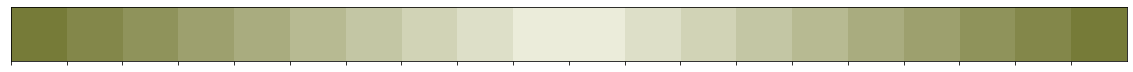

In [248]:
sns.palplot(sns.diverging_palette(90, 90, sep = 1, n = 20))

Text(0.5, 1.0, 'Mapa de correlación')

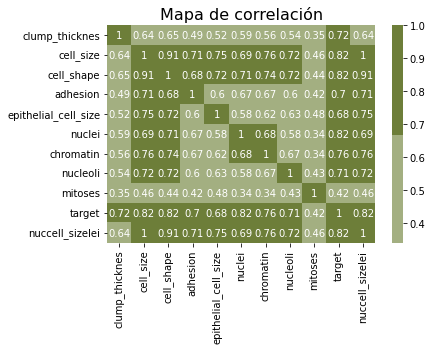

In [249]:
paletaColores = sns.diverging_palette(0, 100, sep = 10, as_cmap = False)

sns.heatmap(df.corr(), annot = True, cmap = paletaColores, center = 0).set_title("Mapa de correlación", fontsize = 16)
#df2.plot.scatter(x = 'Age', y = 'Credit_amount')


Si, existen. Concideramos variables correlacionadas a las que están por encima de 0.68.


In [250]:
df_sin_corr = df
df_sin_corr = df_sin_corr.drop(columns=['cell_size', 'cell_shape'])
df_sin_corr.corr()


,clump_thicknes,adhesion,epithelial_cell_size,nuclei,chromatin,nucleoli,mitoses,target,nuccell_sizelei
clump_thicknes,1.000000,0.486356,0.521816,0.588433,0.558428,0.535835,0.350034,0.716001,0.644913
adhesion,0.486356,1.000000,0.599599,0.666086,0.666715,0.603352,0.417633,0.696800,0.705582
epithelial_cell_size,0.521816,0.599599,1.000000,0.582331,0.616102,0.628881,0.479101,0.682785,0.751799
nuclei,0.588433,0.666086,0.582331,1.000000,0.676167,0.577347,0.339844,0.817442,0.687417
chromatin,0.558428,0.666715,0.616102,0.676167,1.000000,0.665878,0.344169,0.756616,0.755721
nucleoli,0.535835,0.603352,0.628881,0.577347,0.665878,1.000000,0.428336,0.712244,0.722865
mitoses,0.350034,0.417633,0.479101,0.339844,0.344169,0.428336,1.000000,0.423170,0.458693
target,0.716001,0.696800,0.682785,0.817442,0.756616,0.712244,0.423170,1.000000,0.817904
nuccell_sizelei,0.644913,0.705582,0.751799,0.687417,0.755721,0.722865,0.458693,0.817904,1.000000


Text(0.5, 1.0, 'Nuevo Mapa de correlación')

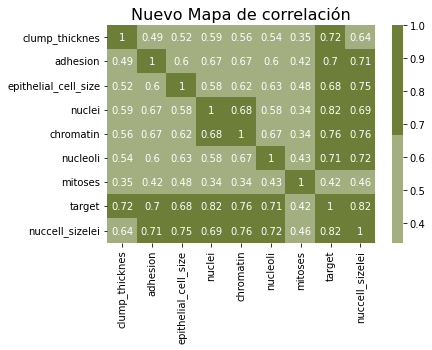

In [251]:
sns.heatmap(df_sin_corr.corr(), annot = True, cmap = paletaColores, center = 0).set_title("Nuevo Mapa de correlación", fontsize = 16)

Eliminamos las features cell_size y cell_shape que son las que estaban más correlacionadas con el resto de las features. Si bien se ve una correlación entre nuclei y chromatin esta es mínima y por eso no eliminamos ninguna de las 2 features. Tampoco se elimina la feature target es la que se necesita para calcular la eficiencia del algoritmo.

**¿Es necesario utilizar one hot enconding? ¿Por qué?**

No, porque son todas variables numéricas y el one hot encoding se usa para variables categoricas.

**¿Es necesario realizar feature scaling? ¿Por qué?**



In [252]:
print(df_sin_corr.loc[df_sin_corr['clump_thicknes'] > 10])
print(df_sin_corr.loc[df_sin_corr['clump_thicknes'] < 0])
print(df_sin_corr.loc[df_sin_corr['adhesion'] > 10])
print(df_sin_corr.loc[df_sin_corr['adhesion'] < 0])
print(df_sin_corr.loc[df_sin_corr['epithelial_cell_size'] > 10])
print(df_sin_corr.loc[df_sin_corr['epithelial_cell_size'] < 0])
print(df_sin_corr.loc[df_sin_corr['nuclei'] > 10])
print(df_sin_corr.loc[df_sin_corr['nuclei'] < 0])
print(df_sin_corr.loc[df_sin_corr['chromatin'] > 10])
print(df_sin_corr.loc[df_sin_corr['chromatin'] < 0])
print(df_sin_corr.loc[df_sin_corr['nucleoli'] > 10])
print(df_sin_corr.loc[df_sin_corr['nucleoli'] < 0])
print(df_sin_corr.loc[df_sin_corr['mitoses'] > 10])
print(df_sin_corr.loc[df_sin_corr['mitoses'] < 0])
print(df_sin_corr.loc[df_sin_corr['target'] > 10])
print(df_sin_corr.loc[df_sin_corr['target'] < 0])

Empty DataFrame
Columns: [clump_thicknes, adhesion, epithelial_cell_size, nuclei, chromatin, nucleoli, mitoses, target, nuccell_sizelei]
Index: []
Empty DataFrame
Columns: [clump_thicknes, adhesion, epithelial_cell_size, nuclei, chromatin, nucleoli, mitoses, target, nuccell_sizelei]
Index: []
Empty DataFrame
Columns: [clump_thicknes, adhesion, epithelial_cell_size, nuclei, chromatin, nucleoli, mitoses, target, nuccell_sizelei]
Index: []
Empty DataFrame
Columns: [clump_thicknes, adhesion, epithelial_cell_size, nuclei, chromatin, nucleoli, mitoses, target, nuccell_sizelei]
Index: []
Empty DataFrame
Columns: [clump_thicknes, adhesion, epithelial_cell_size, nuclei, chromatin, nucleoli, mitoses, target, nuccell_sizelei]
Index: []
Empty DataFrame
Columns: [clump_thicknes, adhesion, epithelial_cell_size, nuclei, chromatin, nucleoli, mitoses, target, nuccell_sizelei]
Index: []
Empty DataFrame
Columns: [clump_thicknes, adhesion, epithelial_cell_size, nuclei, chromatin, nucleoli, mitoses, target

No es necesario aplicar feature scaling porque pudimos comprobar (línea de código anterior) que los valores de todas las features están en la escala entre 0 y 10

**¿La media de las variables es diferente según si el registro es bengino o maligno?**

In [253]:
print(df_sin_corr.groupby('target')['clump_thicknes'].mean())
print('-----------------------------------------------')
print(df_sin_corr.groupby('target')['adhesion'].mean())
print('-----------------------------------------------')
print(df_sin_corr.groupby('target')['epithelial_cell_size'].mean())
print('-----------------------------------------------')
print(df_sin_corr.groupby('target')['nuclei'].mean())
print('-----------------------------------------------')
print(df_sin_corr.groupby('target')['chromatin'].mean())
print('-----------------------------------------------')
print(df_sin_corr.groupby('target')['nucleoli'].mean())
print('-----------------------------------------------')
print(df_sin_corr.groupby('target')['mitoses'].mean())

target
0    2.956332
1    7.195021
Name: clump_thicknes, dtype: float64
-----------------------------------------------
target
0    1.364629
1    5.547718
Name: adhesion, dtype: float64
-----------------------------------------------
target
0    2.120087
1    5.298755
Name: epithelial_cell_size, dtype: float64
-----------------------------------------------
target
0    1.397380
1    7.589212
Name: nuclei, dtype: float64
-----------------------------------------------
target
0    2.100437
1    5.979253
Name: chromatin, dtype: float64
-----------------------------------------------
target
0    1.290393
1    5.863071
Name: nucleoli, dtype: float64
-----------------------------------------------
target
0    1.063319
1    2.589212
Name: mitoses, dtype: float64


Para todas las features el valor de media para el tipo de tumor (benigno o maligno), es diferente.

**Grafique las variables separando registros bengignos vs malignos**

In [254]:
df_sin_corr_benigno = df.loc[df['target'] == 0]
df_sin_corr_maligno = df.loc[df['target'] == 1]
labels = ['benigno', 'maligno']

Comparación de clump_thicknes según tumor benigno (azul) o malgino (naranja)


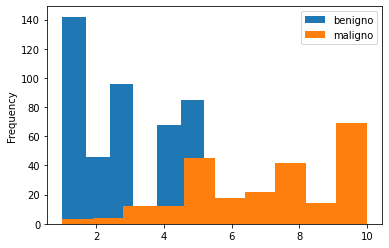

In [255]:
print('Comparación de clump_thicknes según tumor benigno (azul) o malgino (naranja)')
df_sin_corr_benigno['clump_thicknes'].plot.hist()
df_sin_corr_maligno['clump_thicknes'].plot.hist()
pl.legend(labels)

Comparación de adhesion según tumor benigno (azul) o malgino (naranja)


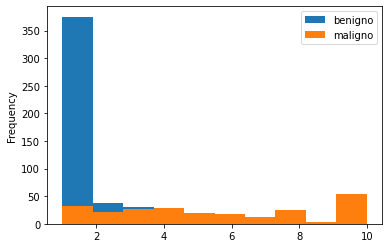

In [256]:
print('Comparación de adhesion según tumor benigno (azul) o malgino (naranja)')
df_sin_corr_benigno['adhesion'].plot.hist()
df_sin_corr_maligno['adhesion'].plot.hist()
pl.legend(labels)

Comparación de epithelial_cell_size según tumor benigno (azul) o malgino (naranja)


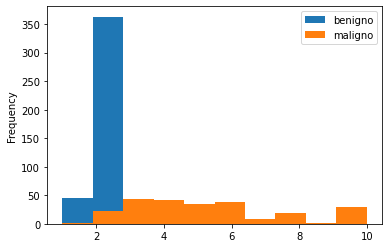

In [257]:
print('Comparación de epithelial_cell_size según tumor benigno (azul) o malgino (naranja)')
df_sin_corr_benigno['epithelial_cell_size'].plot.hist()
df_sin_corr_maligno['epithelial_cell_size'].plot.hist()
pl.legend(labels)

Comparación de nuclei según tumor benigno (azul) o malgino (naranja)


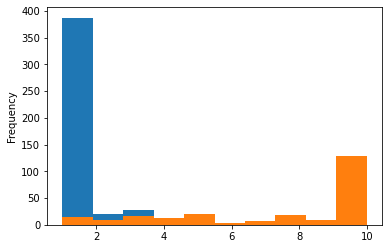

In [258]:
print('Comparación de nuclei según tumor benigno (azul) o malgino (naranja)')
df_sin_corr_benigno['nuclei'].plot.hist()
df_sin_corr_maligno['nuclei'].plot.hist()

Comparación de chromatin según tumor benigno (azul) o malgino (naranja)


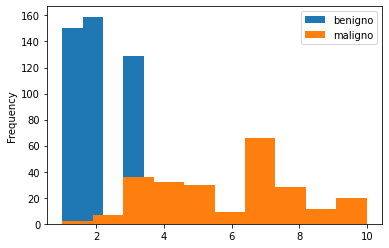

In [259]:
print('Comparación de chromatin según tumor benigno (azul) o malgino (naranja)')
df_sin_corr_benigno['chromatin'].plot.hist()
df_sin_corr_maligno['chromatin'].plot.hist()
pl.legend(labels)

Comparación de nucleoli según tumor benigno (azul) o malgino (naranja)


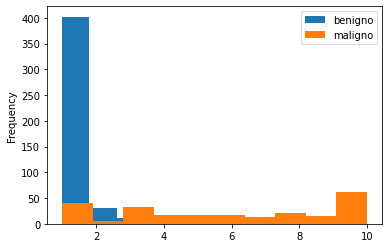

In [260]:
print('Comparación de nucleoli según tumor benigno (azul) o malgino (naranja)')
df_sin_corr_benigno['nucleoli'].plot.hist()
df_sin_corr_maligno['nucleoli'].plot.hist()
pl.legend(labels)

Comparación de mitoses según tumor benigno (azul) o malgino (naranja)


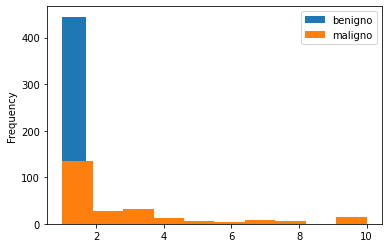

In [261]:
print('Comparación de mitoses según tumor benigno (azul) o malgino (naranja)')
df_sin_corr_benigno['mitoses'].plot.hist()
df_sin_corr_maligno['mitoses'].plot.hist()
pl.legend(labels)

##B - Arbol de decisión


**Cree un Árbol de Decisión para este set de datos que alcance al menos 93% de precisión. Recuerde realizar los siguientes pasos:**

**Separar los datos en conjuntos de entrenamiento y test**

In [262]:
random_state = 31
x = df_sin_corr.drop(columns = "target")
y = df_sin_corr["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.32, random_state = random_state)

**Entrenar el modelo**

In [263]:
arbol = DecisionTreeClassifier(criterion = "entropy",
                               random_state = 31)
arbol

print('Cantidad de datos de entrenamiento X_train', len(x_train))
print('Cantidad de datos de entrenamiento Y_train', len(y_train))

print('Cantidad de datos de test X_test', len(x_test))
print('Cantidad de datos de test y_test', len(y_test))



Cantidad de datos de entrenamiento X_train 475
Cantidad de datos de entrenamiento Y_train 475
Cantidad de datos de test X_test 224
Cantidad de datos de test y_test 224


In [264]:
arbol.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=31, splitter='best')

**Evaluar el modelo**

In [265]:
y_pred = arbol.predict(x_test)
accuracy_score(y_pred, y_test)


0.9464285714285714

**Graficar el arbol**

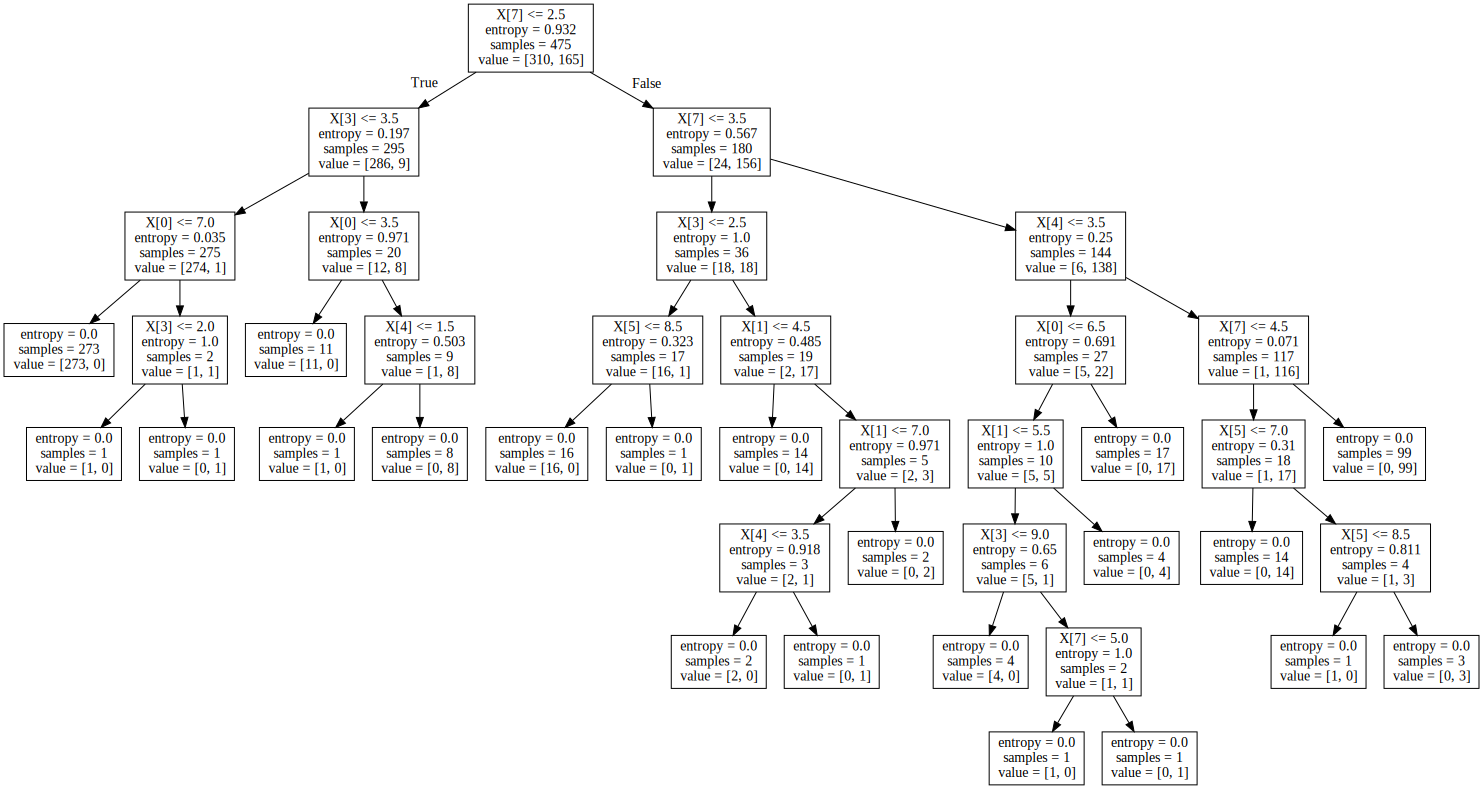

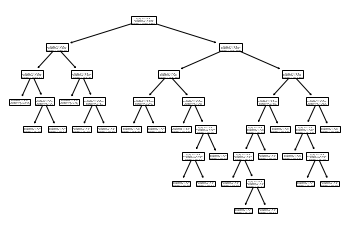

In [266]:
from sklearn import tree
tree.plot_tree(arbol) 
dot_data = tree.export_graphviz(arbol, out_file = None) 
graph = graphviz.Source(dot_data) 
graph

**Explique por qué seleccionó el modelo final argumentando lo observado al modificar los distintos párametros del algoritmo, puede poner como ejemplo otros árboles.**

In [267]:
arbol2 = DecisionTreeClassifier(max_depth = 1, 
                                min_samples_split= 3,
                                min_samples_leaf=2,
                               criterion = "entropy")

In [268]:
arbol2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [269]:
print('Arbol1: test ', arbol.score(x_test, y_test), 'train ', arbol.score(x_train,y_train))
print('Arbol2: test ', arbol2.score(x_test, y_test),'train ', arbol2.score(x_train,y_train))

Arbol1: test  0.9464285714285714 train  1.0
Arbol2: test  0.9107142857142857 train  0.9305263157894736


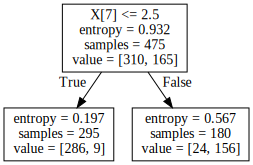

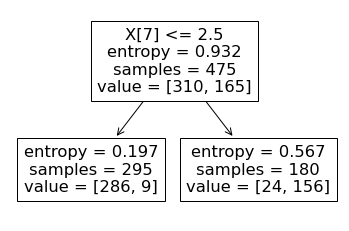

In [270]:
from sklearn import tree
tree.plot_tree(arbol2) 
dot_data = tree.export_graphviz(arbol2, out_file = None) 
graph = graphviz.Source(dot_data) 
graph